# Fourier Work
The following are exercises that are based on the discussion of Fourier transforms in Mark Newman's book, "Computational Physics".

## 1) Basics of DFTs

In [9]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

1.1 Write a function that performs a discrete Fourier Transform on a *real-valued* signal containing $N$ samples.

In [10]:
# k is a plain number and n is time
# x = n/N * L, represents time progress
# v = k / L, represents frequency
def py_dft(signal):
    N = len(signal)
    retarr = np.ndarray(int(N//2 + 1),dtype='complex')
    for k in range(int(N//2) + 1):
        a = 0j 
        for n in range(N):
            a += signal[n]*np.exp(-1j*2*np.pi*k*(n/N))
        retarr[k] = a
    return np.array(retarr)

In [11]:
y = np.random.rand(10)
c = py_dft(y)
print(c)
N = len(y)
print(len(c) == N//2 + 1)
print(np.allclose(c, np.fft.rfft(y)))

[ 5.02570774+0.00000000e+00j  0.54943748+1.25412653e+00j
  0.442683  -3.30997845e-01j  0.70902733+6.13821961e-01j
  0.28561341+5.20367920e-01j -0.78530631-1.30386689e-15j]
True
True


Consider the sine-wave with frequency $f$.

\begin{equation}
f(t) = sin(2 \pi f t)
\end{equation}

Let's assume that $f = \frac{1}{150}$ Hz (recall: Hz is (1 / seconds)). Thus the period of the wave is $T = 1/f = 150$ seconds.

1.2 Using Euler's formula: $e^{ix} = \cos{x} + i\sin{x}$, write this sine wave in terms of complex-valued exponentials (i.e, using $e^{ix}$). Notice that this represents a very simple inverse Fourier series: one in which only a single frequency is present.
> 1.2 Solution: *SOLUTION HERE*


1.3 Take $N=100$ samples of this sine wave over four complete periods of oscillation. That is, create an array of $t_{n} = \frac{n}{N}L$; for $n = 0, 1, ... N-1$, where $L = 4T$, and create a corresponding array of $y_{n} = f(t_{n})$ .

In [12]:
times = np.linspace(0, 4 * 150, num=100)
samples = np.sin(times * 2 * np.pi * 1/150)
#print(samples)

1.4 Plot the sampled signal, $y_{n}$. Using the code

```python
fig, ax = plt.subplots()
ax.plot(t, samples, marker='x')
ax.grid()
ax.set_xlabel("t (seconds)")
```

<IPython.core.display.Javascript object>


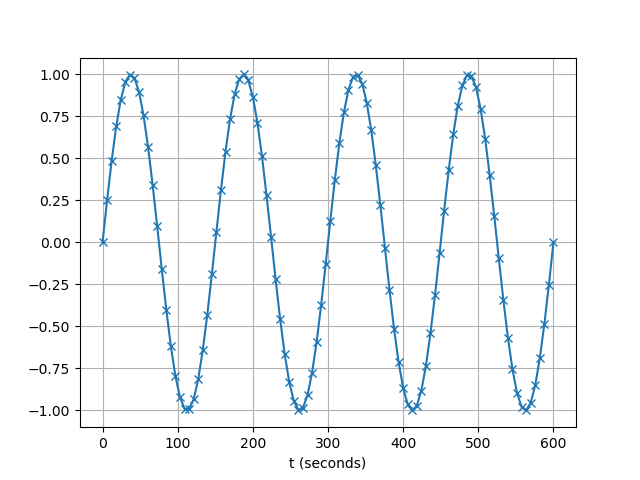

Text(0.5, 0, 't (seconds)')

In [13]:
fig, ax = plt.subplots()
ax.plot(times, samples, marker='x')
ax.grid()
ax.set_xlabel("t (seconds)")

1.5 Perform a real-valued DFT of the sampled wave-form, obtaining $c_{k}$. How many Fourier-coefficients will be produced? Verify that numpy's FFT (for real-valued signals), `np.fft.rfft`, returns the same results as your DFT. Use the function `numpy.allclose` to compare your array of coefficients with those produced by `np.fft.rfft`.

In [21]:
c = py_dft(samples)
#print(c)
N = len(samples)
L = 150 * 4
print(len(c) == N//2 + 1)
print(np.allclose(c, np.fft.rfft(samples)))

True
True


1.6 Recall that $k$ takes on integer values: $0, 1, ..., N//2 + 1$. Convert each $k$ value into frequency, $\nu_{k}$, with units of Hz. 

Similarly, $n$ takes on integer values: $0, 1, ..., N - 1$. Convert $n$ into time, $t_{n}$, with units of seconds.

> 1.6 Solution: *SOLUTION HERE*

In [22]:
f = 1/150
Vk = np.arange(N//2 + 1,dtype='float')
Vk /= L

Tn = np.arange(N, dtype='float64')
Tn *= L/N

print(Vk)
print(Tn)
print(np.absolute(c))

[0.         0.00166667 0.00333333 0.005      0.00666667 0.00833333
 0.01       0.01166667 0.01333333 0.015      0.01666667 0.01833333
 0.02       0.02166667 0.02333333 0.025      0.02666667 0.02833333
 0.03       0.03166667 0.03333333 0.035      0.03666667 0.03833333
 0.04       0.04166667 0.04333333 0.045      0.04666667 0.04833333
 0.05       0.05166667 0.05333333 0.055      0.05666667 0.05833333
 0.06       0.06166667 0.06333333 0.065      0.06666667 0.06833333
 0.07       0.07166667 0.07333333 0.075      0.07666667 0.07833333
 0.08       0.08166667 0.08333333]
[  0.   6.  12.  18.  24.  30.  36.  42.  48.  54.  60.  66.  72.  78.
  84.  90.  96. 102. 108. 114. 120. 126. 132. 138. 144. 150. 156. 162.
 168. 174. 180. 186. 192. 198. 204. 210. 216. 222. 228. 234. 240. 246.
 252. 258. 264. 270. 276. 282. 288. 294. 300. 306. 312. 318. 324. 330.
 336. 342. 348. 354. 360. 366. 372. 378. 384. 390. 396. 402. 408. 414.
 420. 426. 432. 438. 444. 450. 456. 462. 468. 474. 480. 486. 492. 498.
 50

1.7 What should the plot of $|c_{k}|$ vs $\nu_{k}$, look like, considering the form of the original signal that we sampled? Reflect on what the form of the sine-wave, written in terms of $e^{ix}$, looked like in relation to an inverse Fourier transform.  
> 1.7 Solution: *SOLUTION HERE*

1.8 Plot $|c_{k}|$ vs $\nu_{k}$ along with a vertical line, where you predict the peak to occur. Use the following pseudocode to help you with your plot:

```python
fig, ax = plt.subplots()
signal_freq = 1/150

ax.plot(???, ???)  # plot ck vs vk

ax.vlines(signal_freq, 0, 50)  # plots a vertical line at the frequency corresponding to our sine wave

# make the plot look nice
ax.set_xlim(0, 0.03)
ax.grid(True)
ax.set_ylabel(r"$| c_{k} |$")
ax.set_xlabel("Frequency (Hz)");
```

<IPython.core.display.Javascript object>


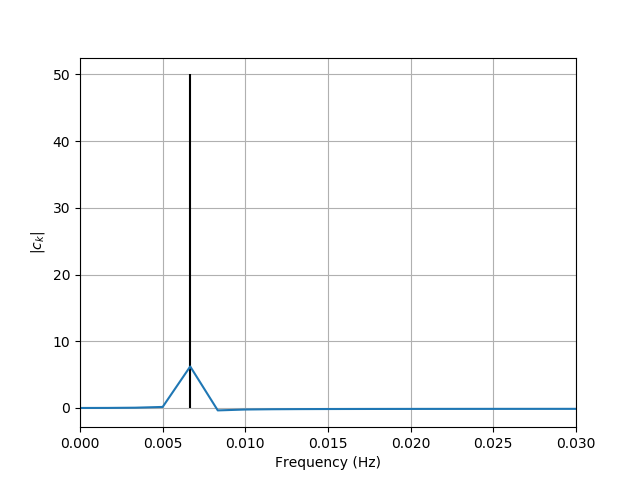

In [23]:
fig, ax = plt.subplots()
signal_freq = 1/150

ax.plot(Vk, c)  # plot ck vs vk

ax.vlines(signal_freq, 0, 50)  # plots a vertical line at the frequency corresponding to our sine wave

# make the plot look nice
ax.set_xlim(0, 0.03)
ax.grid(True)
ax.set_ylabel(r"$| c_{k} |$")
ax.set_xlabel("Frequency (Hz)");

This peak-valued coefficient, $c_{p}$, should be the only non-zero coefficient.

Given the Fourier series that you wrote above, and the equation for the DFT, see that the following relation must hold
\begin{equation}
\frac{1}{2i}e^{i 2 \pi f t} + \frac{-1}{2i}e^{-i 2 \pi f t} \approx \frac{1}{N}(c_{p}e^{i 2 \pi f t} + c^{*}_{p}e^{-i 2 \pi f t})
\end{equation}

That is, see that $\frac{c_{p}}{N} \approx \frac{1}{2i} = -\frac{i}{2}$

1.8 Find the $k$ value that corresponds to the largest $c_{k}$ among your Fourier coefficients. Hint: at which frequency did the peak occur? How can you convert that frequency to a $k$-value? (Note: you will have to chop off decimal places to convert it to an integer).

Verify that $\frac{c_{p}}{N} \approx \frac{1}{2i}$, in accordance with the relationship:

\begin{equation}
\sin{ft} = \frac{1}{2i}e^{i 2 \pi f t} + \frac{-1}{2i}e^{-i 2 \pi f t}
\end{equation}

which resembles our inverse Fourier series.

In [24]:
#c = np.absolute(c)
c[4]/N == -1j/2
print(c[4])
print(-1j/2)

(6.2181060867693585-49.22137798233526j)
(-0-0.5j)


1.9 Use `np.fft.irfft` to compute the *exact* inverse DFT and verify that it recovers the original sampled data.

In [27]:
np.allclose(np.fft.irfft(c, n = len(samples)), samples)

True

1.10 Return to the "Audio Signals Basics" notebook and copy the code that you used to sample and plot the major triad:
 - 523.25 Hz (C)
 - 659.25 Hz (E)
 - 783.99 Hz (G)

Sample 0.5 seconds of this analog signal using a sample rate of 2000 Hz. Take the discrete Fourier transform of the resulting digital signal. Plot the magnitudes of the Fourier coefficients as a function of frequency: $|c_{k}|$ vs $\nu_{k}$. What are the significance of the peaks that you see? What information does this plot provide us with that a plot of the wave form doesn't?

Use `ax.set_xlim(400, 1000)` to limit the x-values plotted to be between 400Hz and 1000Hz.

<IPython.core.display.Javascript object>


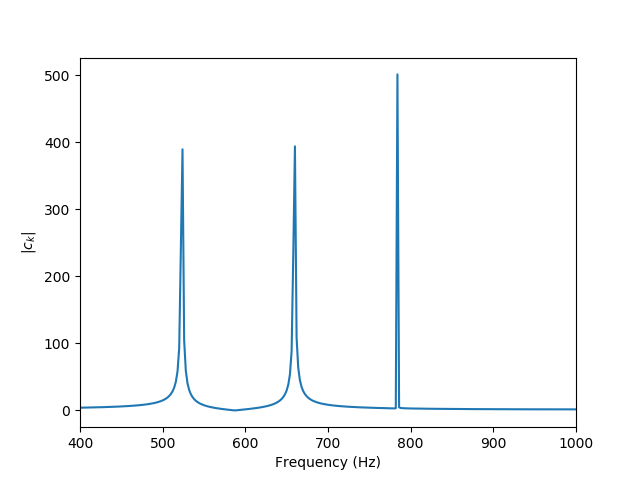

In [28]:
def f(t, A, f): return A*np.sin(2*np.pi*f*t)


L = .5  
N = int(0.5 * 2000)
t = np.arange(N) * (L / N)  

chord = f(t, 1, 523.25) + f(t, 1, 659.25) + f(t, 1, 783.99)  


kvals = np.arange(N//2 + 1)


v = kvals / L

fourier = np.fft.rfft(chord) 



fig, ax = plt.subplots()
ax.plot(v, np.abs(fourier))
ax.set_xlim(400, 1000)
ax.set_ylabel(r"$| c_{k} |$")
ax.set_xlabel("Frequency (Hz)");